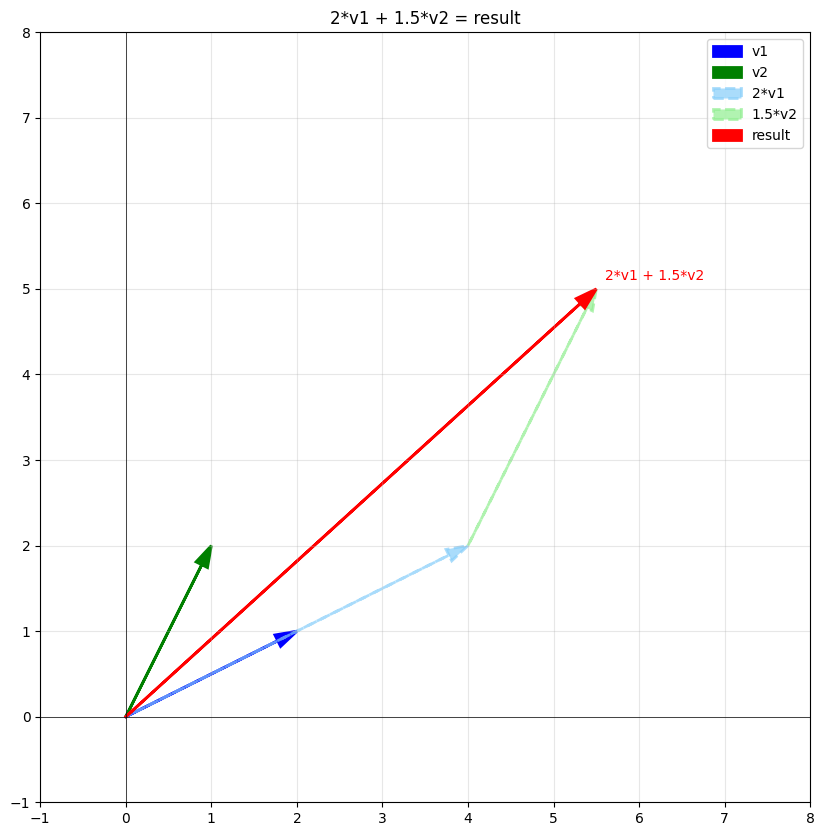

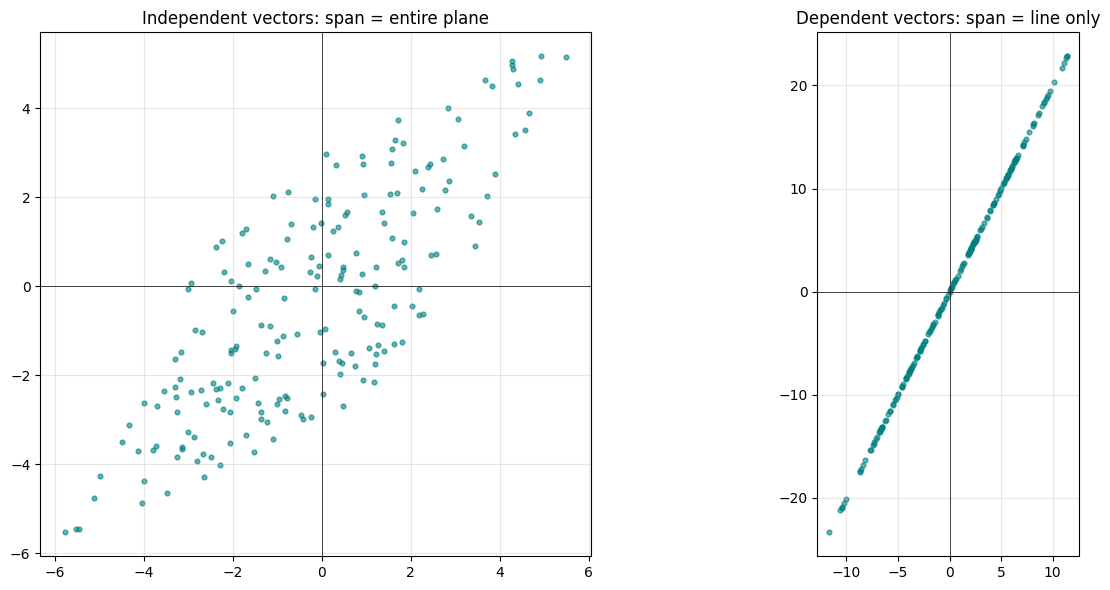

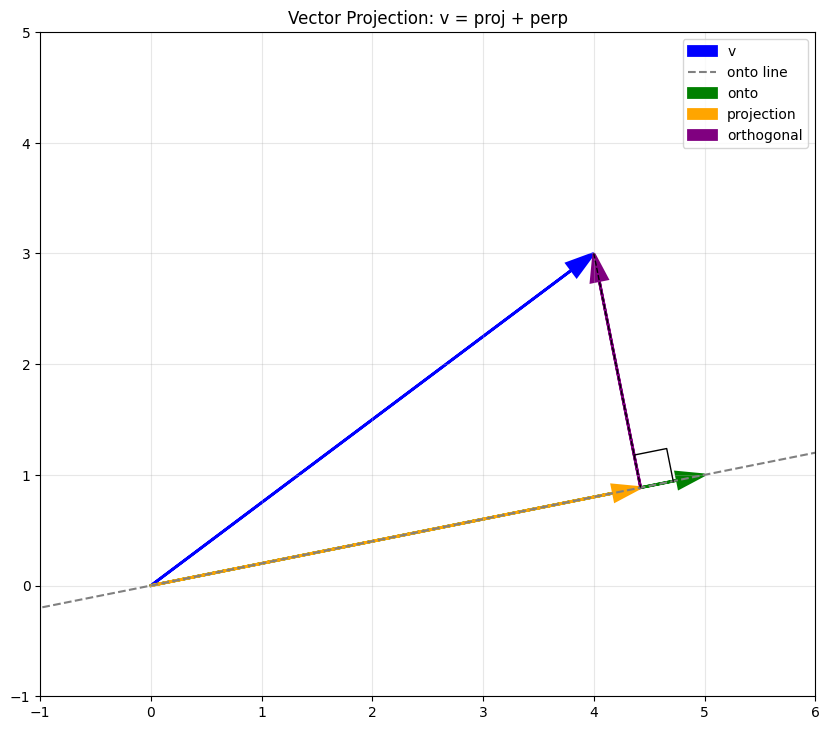

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from src.vector import (
Vector,
linear_combination,
project_onto,
component_orthogonal_to
)

def visualize_linear_combination():
    """
    Show how linear combinations work.

    Display:
    - Two basis vectors
    - A target vector
    - The linear combination that creates it
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    # Basis vectors
    v1 = Vector([2, 1])
    v2 = Vector([1, 2])

    # Scalars
    c1, c2 = 2, 1.5

    # Result
    result = linear_combination([v1, v2], [c1, c2])

    v1_x, v1_y = v1.components
    v2_x, v2_y = v2.components
    c1_v1 = v1 * c1
    c2_v2 = v2 * c2
    c1_x, c1_y = c1_v1.components
    c2_x, c2_y = c2_v2.components
    res_x, res_y = result.components

    arrow_kwargs = dict(length_includes_head=True, head_width=0.15, head_length=0.25, linewidth=2)
    dashed_kwargs = dict(linestyle="--", alpha=0.7)

    # Plot v1 from origin (blue)
    ax.arrow(0, 0, v1_x, v1_y, color="blue", label="v1", **arrow_kwargs)
    # Plot v2 from origin (green)
    ax.arrow(0, 0, v2_x, v2_y, color="green", label="v2", **arrow_kwargs)
    # Plot c1*v1 from origin (light blue, dashed)
    ax.arrow(0, 0, c1_x, c1_y, color="lightskyblue", label=f"{c1}*v1", **arrow_kwargs, **dashed_kwargs)
    # Plot c2*v2 from tip of c1*v1 (light green, dashed)
    ax.arrow(c1_x, c1_y, c2_x, c2_y, color="lightgreen", label=f"{c2}*v2", **arrow_kwargs, **dashed_kwargs)
    # Plot result from origin (red)
    ax.arrow(0, 0, res_x, res_y, color="red", label="result", **arrow_kwargs)
    # Add labels showing the equation
    ax.text(res_x + 0.1, res_y + 0.1, f"{c1}*v1 + {c2}*v2", color="red")

    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 8)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    plt.title(f"{c1}*v1 + {c2}*v2 = result")
    plt.legend()
    plt.savefig("../figures/linear_combination.png")
    plt.show()


def visualize_span():
    """
    Visualize the span of two vectors.

    Show many random linear combinations to illustrate
    that two non-parallel 2D vectors span the entire plane.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Case 1: Independent vectors (span the plane)
    v1 = Vector([1, 0.5])
    v2 = Vector([0.5, 1])

    ax = axes[0]
    coeffs = np.random.uniform(-4, 4, size=(200, 2))
    points = [linear_combination([v1, v2], [c1, c2]) for c1, c2 in coeffs]
    xs = [p.components[0] for p in points]
    ys = [p.components[1] for p in points]
    ax.scatter(xs, ys, s=12, alpha=0.6, color="teal")
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.set_title("Independent vectors: span = entire plane")

    # Case 2: Dependent vectors (span only a line)
    v1 = Vector([1, 2])
    v2 = Vector([2, 4])  # Parallel to v1

    ax = axes[1]
    coeffs = np.random.uniform(-4, 4, size=(200, 2))
    points = [linear_combination([v1, v2], [c1, c2]) for c1, c2 in coeffs]
    xs = [p.components[0] for p in points]
    ys = [p.components[1] for p in points]
    ax.scatter(xs, ys, s=12, alpha=0.6, color="teal")
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.set_title("Dependent vectors: span = line only")

    plt.tight_layout()
    plt.savefig("../figures/span_visualization.png")
    plt.show()


def visualize_projection():
    """
    Visualize vector projection.

    Show:
    - Original vector
    - Vector being projected onto
    - Projection (parallel component)
    - Orthogonal component
    - Right angle marker
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    v = Vector([4, 3])
    onto = Vector([5, 1])

    proj = project_onto(v, onto)
    perp = component_orthogonal_to(v, onto)

    v_x, v_y = v.components
    onto_x, onto_y = onto.components
    proj_x, proj_y = proj.components
    perp_x, perp_y = perp.components

    arrow_kwargs = dict(length_includes_head=True, head_width=0.15, head_length=0.25, linewidth=2)

    # Plot original vector v
    ax.arrow(0, 0, v_x, v_y, color="blue", label="v", **arrow_kwargs)
    # Plot the 'onto' vector (extended as a line)
    line_scale = 6 / max(abs(onto_x), abs(onto_y))
    line_x = np.array([-line_scale, line_scale]) * onto_x
    line_y = np.array([-line_scale, line_scale]) * onto_y
    ax.plot(line_x, line_y, color="gray", linestyle="--", label="onto line")
    ax.arrow(0, 0, onto_x, onto_y, color="green", label="onto", **arrow_kwargs)
    # Plot projection of v onto 'onto'
    ax.arrow(0, 0, proj_x, proj_y, color="orange", label="projection", **arrow_kwargs)
    # Plot orthogonal component
    ax.arrow(proj_x, proj_y, perp_x, perp_y, color="purple", label="orthogonal", **arrow_kwargs)
    # Draw dashed line from v's tip to projection
    ax.plot([v_x, proj_x], [v_y, proj_y], color="black", linestyle="--", linewidth=1)
    # Add right angle marker
    onto_unit = np.array([onto_x, onto_y]) / np.linalg.norm([onto_x, onto_y])
    perp_unit = np.array([perp_x, perp_y]) / np.linalg.norm([perp_x, perp_y])
    marker_size = 0.3
    corner = np.array([proj_x, proj_y])
    p1 = corner + onto_unit * marker_size
    p2 = p1 + perp_unit * marker_size
    p3 = corner + perp_unit * marker_size
    ax.plot([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], color="black", linewidth=1)

    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    plt.title("Vector Projection: v = proj + perp")
    plt.legend()
    plt.savefig("../figures/projection.png")
    plt.show()


def interactive_basis_change():
    """
    Show how the same point has different coordinates in different bases.

    Point [3, 2] in standard basis.
    What are its coordinates in basis {[1,1], [1,-1]}?
    """
    # Standard basis
    e1 = Vector([1, 0])
    e2 = Vector([0, 1])

    # New basis
    b1 = Vector([1, 1])
    b2 = Vector([1, -1])

    # Point in standard coordinates
    point = Vector([3, 2])

    # Find coefficients c1, c2 such that c1*b1 + c2*b2 = point
    basis_matrix = np.array([[b1.components[0], b2.components[0]],
                             [b1.components[1], b2.components[1]]])
    target = np.array(point.components)
    c1, c2 = np.linalg.solve(basis_matrix, target)
    reconstructed = linear_combination([b1, b2], [c1, c2])

    # Visualize both representations
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    ax = axes[0]
    arrow_kwargs = dict(length_includes_head=True, head_width=0.12, head_length=0.2, linewidth=2)
    ax.arrow(0, 0, e1.components[0], e1.components[1], color="gray", label="e1", **arrow_kwargs)
    ax.arrow(0, 0, e2.components[0], e2.components[1], color="black", label="e2", **arrow_kwargs)
    ax.arrow(0, 0, point.components[0], point.components[1], color="red", label="point", **arrow_kwargs)
    ax.set_title("Standard basis")
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.legend()

    ax = axes[1]
    ax.arrow(0, 0, b1.components[0], b1.components[1], color="blue", label="b1", **arrow_kwargs)
    ax.arrow(0, 0, b2.components[0], b2.components[1], color="green", label="b2", **arrow_kwargs)
    ax.arrow(0, 0, reconstructed.components[0], reconstructed.components[1], color="red", label="point", **arrow_kwargs)
    ax.text(reconstructed.components[0] + 0.1, reconstructed.components[1] + 0.1,
            f"coords=({c1:.2f}, {c2:.2f})", color="red")
    ax.set_title("New basis (b1, b2)")
    ax.set_aspect("equal")
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.legend()

    plt.tight_layout()


if __name__ == "__main__":
    visualize_linear_combination()
    visualize_span()
    visualize_projection()